Understanding NLP Libraries

1. NLTK
2. SpaCy
3. Gensim

In [2]:
# loading important libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import gensim
import scipy
import numpy
import json
import nltk
import sys
import csv
import os

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# A few tiny adjustments for better code readability
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
sns.set_style('white')
%matplotlib inline

In [3]:
print(os.listdir("./gap/"))

['constants.py', 'CONTRIBUTING.md', 'gap-development.tsv', 'gap-test.tsv', 'gap-validation.tsv', 'gap_scorer.py', 'LICENSE', 'README.md', 'sample_submission_stage_1.csv', 'test_stage_1.tsv', 'test_stage_1.tsv.zip']


In [4]:
gendered_pronoun_df = pd.read_csv('./gap/test_stage_1.tsv', delimiter='\t')

In [5]:
submission = pd.read_csv('./gap/sample_submission_stage_1.csv')

In [6]:
gendered_pronoun_df.shape

(2000, 9)

In [7]:
submission.shape

(2000, 4)

In [8]:
gendered_pronoun_df.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,Bernard Leach,251,http://en.wikipedia.org/wiki/Warren_MacKenzie
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,De la Sota,246,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,Henry Rosenthal,336,http://en.wikipedia.org/wiki/Crime_(band)
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,Rivera,294,http://en.wikipedia.org/wiki/Jessica_Rivera


In [9]:
print(gendered_pronoun_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
ID                2000 non-null object
Text              2000 non-null object
Pronoun           2000 non-null object
Pronoun-offset    2000 non-null int64
A                 2000 non-null object
A-offset          2000 non-null int64
B                 2000 non-null object
B-offset          2000 non-null int64
URL               2000 non-null object
dtypes: int64(3), object(6)
memory usage: 140.7+ KB
None


In [10]:
gendered_pronoun_df.isna().sum()

ID                0
Text              0
Pronoun           0
Pronoun-offset    0
A                 0
A-offset          0
B                 0
B-offset          0
URL               0
dtype: int64

In [11]:
gendered_pronoun_df["num_words"] = gendered_pronoun_df["Text"].apply(lambda x: len(str(x).split()))

In [12]:
#MJ Bahmani
print('maximum of num_words in data_df',gendered_pronoun_df["num_words"].max())
print('min of num_words in data_df',gendered_pronoun_df["num_words"].min())

maximum of num_words in data_df 204
min of num_words in data_df 16


In [13]:
gendered_pronoun_df["num_unique_words"] = gendered_pronoun_df["Text"].apply(lambda x: len(set(str(x).split())))
print('maximum of num_unique_words in train',gendered_pronoun_df["num_unique_words"].max())
print('mean of num_unique_words in data_df',gendered_pronoun_df["num_unique_words"].mean())

maximum of num_unique_words in train 136
mean of num_unique_words in data_df 56.4005


In [14]:
gendered_pronoun_df["num_chars"] = gendered_pronoun_df["Text"].apply(lambda x: len(str(x)))
print('maximum of num_chars in data_df',gendered_pronoun_df["num_chars"].max())

maximum of num_chars in data_df 1270


In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hmnsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
gendered_pronoun_df["num_stopwords"] = gendered_pronoun_df["Text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

print('maximum of num_stopwords in data_df',gendered_pronoun_df["num_stopwords"].max())

maximum of num_stopwords in data_df 88


In [17]:
import string
gendered_pronoun_df["num_punctuations"] =gendered_pronoun_df['Text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
print('maximum of num_punctuations in data_df',gendered_pronoun_df["num_punctuations"].max())

maximum of num_punctuations in data_df 93


In [18]:
gendered_pronoun_df["num_words_upper"] = gendered_pronoun_df["Text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
print('maximum of num_words_upper in data_df',gendered_pronoun_df["num_words_upper"].max())

maximum of num_words_upper in data_df 11


In [19]:
print(gendered_pronoun_df.columns)
gendered_pronoun_df.head(1)

Index(['ID', 'Text', 'Pronoun', 'Pronoun-offset', 'A', 'A-offset', 'B',
       'B-offset', 'URL', 'num_words', 'num_unique_words', 'num_chars',
       'num_stopwords', 'num_punctuations', 'num_words_upper'],
      dtype='object')


,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...,74,61,426,29,14,0


In [20]:
pronoun=gendered_pronoun_df["Pronoun"]

In [21]:
np.unique(pronoun)

array(['He', 'Her', 'His', 'She', 'he', 'her', 'him', 'his', 'she'],
      dtype=object)

In [22]:
gendered_pronoun_df["Pronoun_binary"] = gendered_pronoun_df["Pronoun"]

In [23]:
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('He','0')
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('he','0')
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('she','1')
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('She','1')
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('His','2')
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('his','2')
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('him','3')
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('her','4')
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('Her','4')

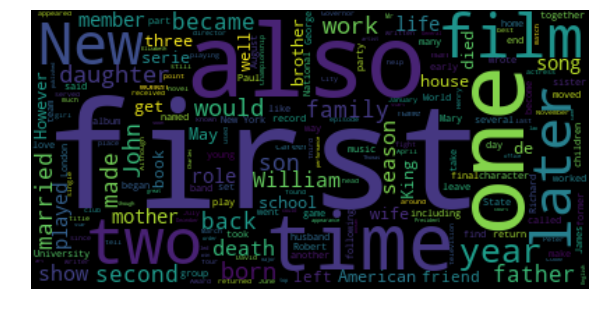

In [30]:
from wordcloud import WordCloud as wc
from nltk.corpus import stopwords
def generate_wordcloud(text): 
    wordcloud = wc(relative_scaling = 1.0,stopwords = eng_stopwords).generate(text)
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.margins(x=0, y=0)
    plt.show()
    

text =" ".join(gendered_pronoun_df.Text)
generate_wordcloud(text)

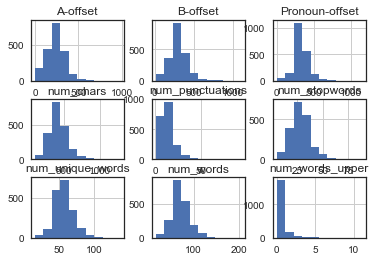

In [24]:
gendered_pronoun_df.hist();

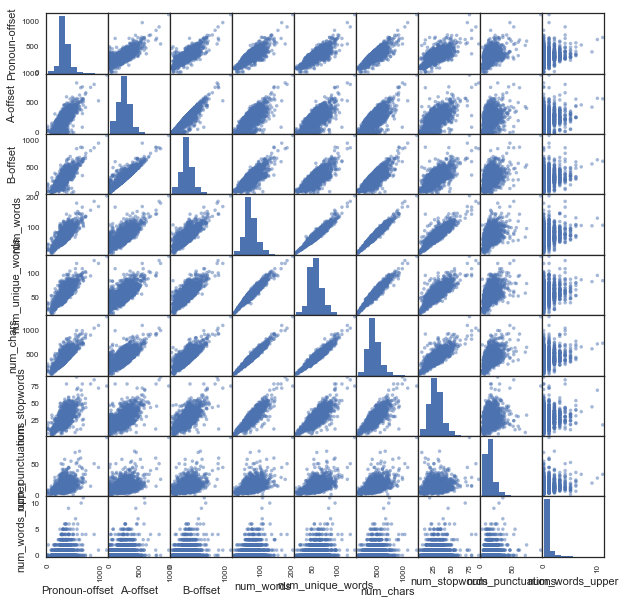

In [25]:
pd.plotting.scatter_matrix(gendered_pronoun_df,figsize=(10,10))
plt.figure();

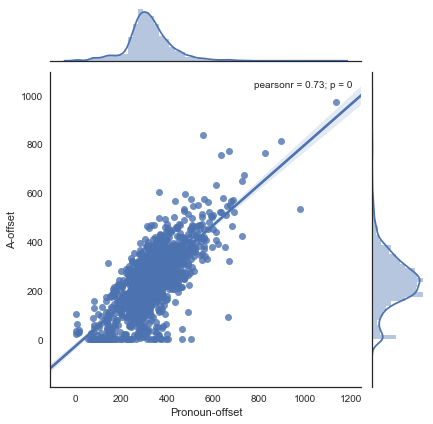

In [26]:
sns.jointplot(x='Pronoun-offset',y='A-offset' ,data=gendered_pronoun_df, kind='reg')

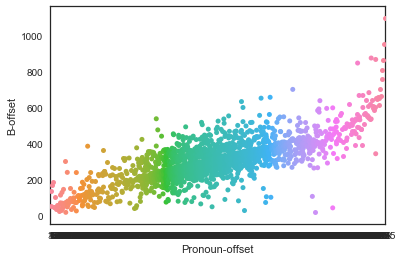

In [27]:
sns.swarmplot(x='Pronoun-offset',y='B-offset',data=gendered_pronoun_df);

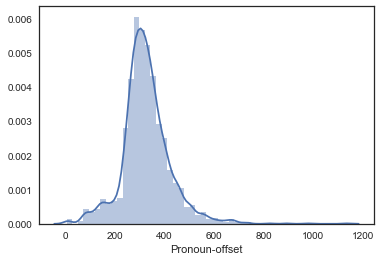

In [28]:
sns.distplot(gendered_pronoun_df["Pronoun-offset"])

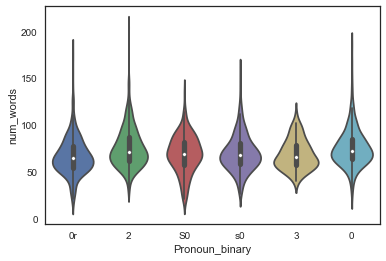

In [29]:

sns.violinplot(data=gendered_pronoun_df,x="Pronoun_binary", y="num_words")

Top 3 NLP Libraries Tutorial
- NLTK
- spaCy
- Gensim

In [31]:
gendered_pronoun_df.Text[0]

"Zoe Telford -- played the police officer girlfriend of Simon, Maggie. Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again. Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class. Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."

In [34]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
our_text=gendered_pronoun_df.Text[0]
print(word_tokenize(our_text))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hmnsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['Zoe', 'Telford', '--', 'played', 'the', 'police', 'officer', 'girlfriend', 'of', 'Simon', ',', 'Maggie', '.', 'Dumped', 'by', 'Simon', 'in', 'the', 'final', 'episode', 'of', 'series', '1', ',', 'after', 'he', 'slept', 'with', 'Jenny', ',', 'and', 'is', 'not', 'seen', 'again', '.', 'Phoebe', 'Thomas', 'played', 'Cheryl', 'Cassidy', ',', 'Pauline', "'s", 'friend', 'and', 'also', 'a', 'year', '11', 'pupil', 'in', 'Simon', "'s", 'class', '.', 'Dumped', 'her', 'boyfriend', 'following', 'Simon', "'s", 'advice', 'after', 'he', 'would', "n't", 'have', 'sex', 'with', 'her', 'but', 'later', 'realised', 'this', 'was', 'due', 'to', 'him', 'catching', 'crabs', 'off', 'her', 'friend', 'Pauline', '.']


NLTK speech tagging


In [36]:
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import PunktSentenceTokenizer

sentences = nltk.sent_tokenize(our_text)   
for sent in sentences:
    print(nltk.pos_tag(nltk.word_tokenize(sent)))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hmnsh\AppData\Roaming\nltk_data...


[('Zoe', 'NNP'), ('Telford', 'NNP'), ('--', ':'), ('played', 'VBD'), ('the', 'DT'), ('police', 'NN'), ('officer', 'NN'), ('girlfriend', 'NN'), ('of', 'IN'), ('Simon', 'NNP'), (',', ','), ('Maggie', 'NNP'), ('.', '.')]
[('Dumped', 'VBN'), ('by', 'IN'), ('Simon', 'NNP'), ('in', 'IN'), ('the', 'DT'), ('final', 'JJ'), ('episode', 'NN'), ('of', 'IN'), ('series', 'NN'), ('1', 'CD'), (',', ','), ('after', 'IN'), ('he', 'PRP'), ('slept', 'VBD'), ('with', 'IN'), ('Jenny', 'NNP'), (',', ','), ('and', 'CC'), ('is', 'VBZ'), ('not', 'RB'), ('seen', 'VBN'), ('again', 'RB'), ('.', '.')]
[('Phoebe', 'NNP'), ('Thomas', 'NNP'), ('played', 'VBD'), ('Cheryl', 'NNP'), ('Cassidy', 'NNP'), (',', ','), ('Pauline', 'NNP'), ("'s", 'POS'), ('friend', 'NN'), ('and', 'CC'), ('also', 'RB'), ('a', 'DT'), ('year', 'NN'), ('11', 'CD'), ('pupil', 'NN'), ('in', 'IN'), ('Simon', 'NNP'), ("'s", 'POS'), ('class', 'NN'), ('.', '.')]
[('Dumped', 'NNP'), ('her', 'PRP$'), ('boyfriend', 'NN'), ('following', 'VBG'), ('Simon', 'N

[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [37]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
 

sentences = nltk.sent_tokenize(our_text)   
 
data = []
for sent in sentences:
    data = data + nltk.pos_tag(nltk.word_tokenize(sent))
 
for word in data: 
    if 'NNP' in word[1]: 
        print(word)

('Zoe', 'NNP')
('Telford', 'NNP')
('Simon', 'NNP')
('Maggie', 'NNP')
('Simon', 'NNP')
('Jenny', 'NNP')
('Phoebe', 'NNP')
('Thomas', 'NNP')
('Cheryl', 'NNP')
('Cassidy', 'NNP')
('Pauline', 'NNP')
('Simon', 'NNP')
('Dumped', 'NNP')
('Simon', 'NNP')
('Pauline', 'NNP')


nlp prediction example
Given a name, the classifier will predict if it’s a male or female.
To create our analysis program, we have several steps:
- Data preparation
- Feature extraction
- Training
- Prediction
- Data preparation The first step is to prepare data. We use the names set included with nltk.

In [39]:
nltk.download('names')
from nltk.corpus import names
 
# Load data and training 
names = ([(name, 'male') for name in names.words('male.txt')] + 
	 [(name, 'female') for name in names.words('female.txt')])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\hmnsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.


In [40]:

import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
 
def gender_features(word): 
    return {'last_letter': word[-1]} 
 
# Load data and training 
names = ([(name, 'male') for name in names.words('male.txt')] + 
	 [(name, 'female') for name in names.words('female.txt')])
 
featuresets = [(gender_features(n), g) for (n,g) in names] 
train_set = featuresets
classifier = nltk.NaiveBayesClassifier.train(train_set) 
 
# Predict
print(classifier.classify(gender_features('Frank')))

male


In [41]:
# Predict, you can change name
name = 'Sarah'
print(classifier.classify(gender_features(name)))

female


Python Sentiment Analysis


In [42]:
positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(' ]
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not' ]

In [43]:
def word_feats(words):
    return dict([(word, True) for word in words])
 
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]

In [44]:
train_set = negative_features + positive_features + neutral_features

In [45]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
 
def word_feats(words):
    return dict([(word, True) for word in words])
 
positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(' ]
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not' ]
 
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]
 
train_set = negative_features + positive_features + neutral_features
 
classifier = NaiveBayesClassifier.train(train_set) 
 
# Predict
neg = 0
pos = 0
##sentence = "Awesome movie, I liked it"
our_text = our_text.lower()
words = our_text.split(' ')
for word in words:
    classResult = classifier.classify( word_feats(word))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1
 
print('Positive: ' + str(float(pos)/len(words)))
print('Negative: ' + str(float(neg)/len(words)))

Positive: 0.527027027027027
Negative: 0.25675675675675674


spaCy is an Industrial-Strength Natural Language Processing in python

In [47]:
import spacy

In [51]:
#[Admin] python -m spacy download en
nlp = spacy.load('en')
doc = nlp(our_text)
i=0
for token in doc:
    i=i+1;
    if i<20:
        print('"' + token.text + '"')

"zoe"
"telford"
"--"
"played"
"the"
"police"
"officer"
"girlfriend"
"of"
"simon"
","
"maggie"
"."
"dumped"
"by"
"simon"
"in"
"the"
"final"


In [52]:
#sentence deletion

nlp = spacy.load('en')
doc=nlp(our_text)
i=0
for sent in doc.sents:
    i=i+1
    print(i,' - ',sent)

1  -  zoe telford -- played the police officer girlfriend of simon, maggie.
2  -  dumped by simon in the final episode of series 1, after he slept with jenny, and is not seen again.
3  -  phoebe thomas played cheryl cassidy, pauline's friend and also a year 11 pupil in simon's class.
4  -  dumped her boyfriend following simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend pauline.


In [53]:
#Part of speech tagging

doc = nlp( our_text)
print([(token.text, token.tag_) for token in doc])

[('zoe', 'CD'), ('telford', 'NN'), ('--', ':'), ('played', 'VBD'), ('the', 'DT'), ('police', 'NN'), ('officer', 'NN'), ('girlfriend', 'NN'), ('of', 'IN'), ('simon', 'NN'), (',', ','), ('maggie', 'NN'), ('.', '.'), ('dumped', 'VBN'), ('by', 'IN'), ('simon', 'NN'), ('in', 'IN'), ('the', 'DT'), ('final', 'JJ'), ('episode', 'NN'), ('of', 'IN'), ('series', 'NN'), ('1', 'CD'), (',', ','), ('after', 'IN'), ('he', 'PRP'), ('slept', 'VBD'), ('with', 'IN'), ('jenny', 'JJ'), (',', ','), ('and', 'CC'), ('is', 'VBZ'), ('not', 'RB'), ('seen', 'VBN'), ('again', 'RB'), ('.', '.'), ('phoebe', 'JJ'), ('thomas', 'NNS'), ('played', 'VBD'), ('cheryl', 'NN'), ('cassidy', 'NN'), (',', ','), ('pauline', 'NN'), ("'s", 'POS'), ('friend', 'NN'), ('and', 'CC'), ('also', 'RB'), ('a', 'DT'), ('year', 'NN'), ('11', 'CD'), ('pupil', 'NN'), ('in', 'IN'), ('simon', 'NN'), ("'s", 'POS'), ('class', 'NN'), ('.', '.'), ('dumped', 'VBD'), ('her', 'PRP$'), ('boyfriend', 'NN'), ('following', 'VBG'), ('simon', 'NN'), ("'s", 'P

In [54]:
#Named entity recognition

doc = nlp(our_text)
for ent in doc.ents:
    print(ent.text, ent.label_)

year 11 DATE


In [55]:
from spacy import displacy
 
doc = nlp(our_text )
displacy.render(doc, style='ent', jupyter=True)

In [56]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

Gensim
Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community.

1. Gensim is a FREE Python library
2. Scalable statistical semantics
3. Analyze plain-text documents for semantic structure
4. Retrieve semantically similar documents

In [57]:
import gensim

In [58]:
from gensim import corpora
from pprint import pprint
# How to create a dictionary from a list of sentences?
documents = ["The Saudis are preparing a report that will acknowledge that", 
             "Saudi journalist Jamal Khashoggi's death was the result of an", 
             "interrogation that went wrong, one that was intended to lead", 
             "to his abduction from Turkey, according to two sources."]

documents_2 = ["One source says the report will likely conclude that", 
                "the operation was carried out without clearance and", 
                "transparency and that those involved will be held", 
                "responsible. One of the sources acknowledged that the", 
                "report is still being prepared and cautioned that", 
                "things could change."]

# Tokenize(split) the sentences into words
texts = [[text for text in doc.split()] for doc in documents]

# Create dictionary
dictionary = corpora.Dictionary(texts)

# Get information about the dictionary
print(dictionary)

Dictionary(33 unique tokens: ['Saudis', 'The', 'a', 'acknowledge', 'are']...)


In [59]:
# Show the word to id map
print(dictionary.token2id)

{'Saudis': 0, 'The': 1, 'a': 2, 'acknowledge': 3, 'are': 4, 'preparing': 5, 'report': 6, 'that': 7, 'will': 8, 'Jamal': 9, "Khashoggi's": 10, 'Saudi': 11, 'an': 12, 'death': 13, 'journalist': 14, 'of': 15, 'result': 16, 'the': 17, 'was': 18, 'intended': 19, 'interrogation': 20, 'lead': 21, 'one': 22, 'to': 23, 'went': 24, 'wrong,': 25, 'Turkey,': 26, 'abduction': 27, 'according': 28, 'from': 29, 'his': 30, 'sources.': 31, 'two': 32}


In [3]:
gh_test = pd.read_csv("https://raw.githubusercontent.com/google-research-datasets/gap-coreference/master/gap-test.tsv", delimiter='\t')
gh_valid = pd.read_csv("https://raw.githubusercontent.com/google-research-datasets/gap-coreference/master/gap-validation.tsv", delimiter='\t')
train = pd.concat((gh_test, gh_valid)).rename(columns={'A': 'A_Noun', 'B': 'B_Noun'}).reset_index(drop=True)
train.shape

(2454, 11)